<a href="https://colab.research.google.com/github/beedrumms/Exploring-Public-Responses-to-Government-COVID-19-Policies/blob/main/10)_B)_NY_Negative_Tweets_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import packages 
import re 
import string
import pandas as pd
import numpy as np

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from datetime import datetime
 
import sklearn 
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pprint import pprint

from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

# Mounting google colab on drive 
from google.colab import drive, files
import os
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Upload negative tweets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_NEG_COVID19_TWEETS_TOPICS.csv')
tweets_df = data.iloc[:, 1:]
tweets_df

,Datetime,Text,Text_Unprocessed,Sentiment_Score,Sentiment_Score_Norm,Sentiment,Topic,Topic_Neg3,Topic_Neg
0,2021-05-30,pandemic democrats republicans refuse work gra...,during the pandemic democrats and republica...,-0.9118,4.410,negative,0,1,5
1,2021-05-30,stand congress location discrimination policy ...,stand up to the congress location di...,-0.6369,18.155,negative,0,1,5
2,2021-05-30,pay tribute give defense country battle field ...,this is about paying tribute to those who ga...,-0.6170,19.150,negative,2,1,1
3,2021-05-30,intervene stop greg abbott take away covid une...,please intervene and stop greg abbott fro...,-0.2244,38.780,negative,0,2,5
4,2021-05-30,crime covid rate crime subject child violence ...,what about crime covid rates may be down bu...,-0.9628,1.860,negative,3,2,2
...,...,...,...,...,...,...,...,...,...
289348,2020-04-14,sorry listen briefing trump rally need coronav...,sorry i never listen to his briefing i have n...,-0.4717,26.415,negative,3,1,1
289349,2020-04-14,mean they re probably go federal money catalog...,it means theyre probably going to get federa...,-0.5574,22.130,negative,1,1,1
289350,2020-04-14,trump halt fund world health organization fail...,so if trump can halt funding to world health o...,-0.6705,16.475,negative,0,1,5
289351,2020-04-14,ought plan daily joint news conference feature...,you and ought to plan a daily joint news con...,-0.4215,28.925,negative,0,1,4


In [3]:
tweets_df['Topic_Neg'] = tweets_df['Topic_Neg'].astype(str)

# Cutting up the dataset into Topics
filter1_topics = tweets_df['Topic_Neg'] == '0'
Topic_1 = tweets_df[filter1_topics]


filter2_topics = tweets_df['Topic_Neg'] == '1'
Topic_2 = tweets_df[filter2_topics]

filter3_topics = tweets_df['Topic_Neg'] == '2'
Topic_3 = tweets_df[filter3_topics]

filter4_topics = tweets_df['Topic_Neg'] == '3'
Topic_4 = tweets_df[filter4_topics]

filter5_topics = tweets_df['Topic_Neg'] == '4'
Topic_5 = tweets_df[filter5_topics]

filter6_topics = tweets_df['Topic_Neg'] == '5'
Topic_6 = tweets_df[filter6_topics]

group = tweets_df['Sentiment_Score'].groupby(tweets_df['Datetime'])
neg_sent_means = group.mean()
print("New York's overall sentiment average over year:", neg_sent_means.mean())

# Getting daily sentiments for topics 
ngroup_topic1 = Topic_1['Sentiment_Score'].groupby(Topic_1['Datetime'])
nsent_avgs_topic1 = ngroup_topic1.mean()
print("New York's Negative Topic 1 average sentiment:",nsent_avgs_topic1.mean())

ngroup_topic2 = Topic_2['Sentiment_Score'].groupby(Topic_2['Datetime'])
nsent_avgs_topic2 = ngroup_topic2.mean()
print("New York's Negative Topic 2 average sentiment:",nsent_avgs_topic2.mean())

ngroup_topic3 = Topic_3['Sentiment_Score'].groupby(Topic_3['Datetime'])
nsent_avgs_topic3 = ngroup_topic3.mean()
print("New York's Negative Topic 3 average sentiment:",nsent_avgs_topic3.mean())

ngroup_topic4 = Topic_4['Sentiment_Score'].groupby(Topic_4['Datetime'])
nsent_avgs_topic4 = ngroup_topic4.mean()
print("New York's Negative Topic 4 average sentiment:",nsent_avgs_topic4.mean())

ngroup_topic5 = Topic_5['Sentiment_Score'].groupby(Topic_5['Datetime'])
nsent_avgs_topic5 = ngroup_topic5.mean()
print("New York's Negative Topic 5 average sentiment:",nsent_avgs_topic5.mean())

ngroup_topic6 = Topic_6['Sentiment_Score'].groupby(Topic_6['Datetime'])
nsent_avgs_topic6 = ngroup_topic6.mean()
print("New York's Negative Topic 6 average sentiment:",nsent_avgs_topic6.mean())

New York's overall sentiment average over year: -0.5744518825063201
New York's Negative Topic 1 average sentiment: -0.5350663699742801
New York's Negative Topic 2 average sentiment: -0.6225627216681751
New York's Negative Topic 3 average sentiment: -0.5475344727186077
New York's Negative Topic 4 average sentiment: -0.623186894879992
New York's Negative Topic 5 average sentiment: -0.563112575266456
New York's Negative Topic 6 average sentiment: -0.5510687920012455


In [4]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

topic_neg_list = tweets_df['Text'].tolist()
common_words = get_top_n_trigram(topic_neg_list, 15)

df_topic2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic2['trigram'], y=df_topic2['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for All Negative Topics"))
fig.show()

In [5]:
for t in tweets_df['Text'][:100]:
  if 'nursing' in t:
    print(t)

pass away hospital instead nurse home attempt hide patient contract virus nursing homebut lie pass away witch hunt good job
suppose believe delibertly lie nursing home death pandemic you ve lose credibility
day year pick recognize lose life covid maybe day decide infect nursing home fitting day
public domain allegation number update ) sexual assaultharassment accuser ) thousand die covid nursing home death camp ) $ mm+ book deal staff + cook covid stat


In [6]:
for t in tweets_df['Text'][:100]:
  if 'patient' in t:
    print(t)

mean colombian comunist politician create chaos hire terrorist destroy city attack police officer roadblock prevent people have food basic supply live medical supply covid patient kill innocent peopleright
pass away hospital instead nurse home attempt hide patient contract virus nursing homebut lie pass away witch hunt good job
look fact force covid patient vulnerable community


In [7]:
for t in tweets_df['Text'][306176:]: # checking the last 100 to see if the # of hits goes up over time
  if 'nursing' in t:
    print(t)

In [8]:
for t in tweets_df['Text'][306176:]: # checking the last 100 to see if the # of hits goes up over time
  if 'patient' in t:
    print(t)

In [9]:
topic1_neg_list = Topic_1['Text'].tolist()
common_words = get_top_n_trigram(topic1_neg_list, 15)

df_topic_neg1 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg1['trigram'], y=df_topic_neg1['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topic 1"))
fig.show()

In [10]:
for t in Topic_1['Text_Unprocessed'][:200]:
  if 'mask' in t:
    print(t)

  my county jail last week  cosampinmate got covid  got shots jampj or moderna  months ago and a reinfection  only  weapons mask distance lockdownamp vaccine         gether
take the masks off and stop pushing the poison pandemic is over        
  if masks are stopping the virus then your clothes hair and exposed skin are a biohazard and must be thoroughly washed after every contact with a person
 take your stupid mask off fake pandemic death vaccine
  (tape dated february  ) people were riding crowded subways getting sick and trump just stayed quiet so as not to hurt the economy he needed to win reelection  later he called covid a democratic hoax mocked  masks and social distancing  he is a premeditated murderer
 ga bans masks for kids in schools   who have the worst covid records as govs are still abusing children with masks  
   uv light kills covid masks outside for those participating in sports crazy!!
 unmask our kids! masks are bad for children development and have no impact on p

In [11]:
for t in Topic_1['Text_Unprocessed'][:100]:
  if 'die' in t:
    print(t)

    the spanish flu at  either they were already infected or have died from it therefore it was slowly eradicated not enough ppl were found for the virus to infect new blood
  nobody has so you just sound like an ignorant moron but guess how many died from the virus that youll take your chances with since the death rate is so low are you afraid of a little needle ❄️❄️❄️
     so im dumb and selfish for choosing not to subject my kids or myself to a vaccine that the manufacturers have no liability has not completed clinical trials has multiple reports of adverse effects to fight a virus which we already had and built antibodies against fuck off
    studies show they have minimal risk when getting covid so why do they need a vaccine  you can still spread and catch covid while having the vaccine its just like the flu and flu shot
     the current scientific consensus is not really if you have antibodies then it is unlikely the virus will be able to multiply enough for you to be a real carr

In [12]:
for t in Topic_1['Text_Unprocessed'][:100]:
  if 'vaccine' in t:
    print(t)

  if you count individuals who had the virus we have reached her immunity (approx ) that doesnt mean you shouldnt get the vaccine it means were over it and it should be treated no different than the flu    
  my county jail last week  cosampinmate got covid  got shots jampj or moderna  months ago and a reinfection  only  weapons mask distance lockdownamp vaccine         gether
 take your stupid mask off fake pandemic death vaccine
      people are morons to believe that covid is anything like the flu as they are different viruses with huge different death ratio flu kills  infected where covid  in the usa stands today at ! thats x deadlier so glad people get the vaccine the best defence  
   eliminate the mandate to have negative covid test or vaccine to do things!
new yorkers that have side effects from the coronavirus vaccine can take a sick day without losing wages  said today the announcement comes as vaccine rates are plateauing in the state and nationally   
news anyone who gets s

In [13]:
topic2_neg_list = Topic_2['Text'].tolist()
common_words = get_top_n_trigram(topic2_neg_list, 15)

df_topic_neg2 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg2['trigram'], y=df_topic_neg2['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topic 2"))
fig.show()

In [14]:
for t in Topic_2['Text_Unprocessed'][:100]:
  if 'kill' in t:
    print(t)

              you mean the colombian comunists politicians created chaos hiring terrorists for destroying the city attacking police officers and roadblocks preventing people from having food basic supplies for living medical supplies for covid patients and killing innocent peopleright
    sadly  i think     have been paid off by the chinese communist party for their warfare virus against us  they killed dr bill wallace though he opened a hospital to help the chinese people they killed many chinese drs and nurses
 the only  style investigation we need right now is an investigation of the wuhan lab and how covid escaped and killed millions worldwide chinas commie govt needs to be held accountable and saint fauci may have played a part in it too get busy chucky
    bbbut its a fake virus and we didnt need to do anything about it! how could we claim its a fake virus and say democrats mishandled it killing people  easy!!! our followers are mindless sheep who dont use logic ever!
 you slimy 

In [15]:
for t in Topic_2['Text_Unprocessed'][:100]:
  if 'home' in t:
    print(t)

 you slimy piece of filth memorial day weekend is to honor the fallen troops who gave their lives in the service of this country not for essential workers or covid how dare you attempt to hijack such a sacred holiday how about focusing on the nursing home patients you killed
 is fighting for  to be held accountable for how he handled nursing homes during the pandemic even as he continues to pretend like nothing has happened via    
 is fighting for  to be held accountable for how he handled nursing homes during the pandemic even as he continues to pretend like nothing has happened via          enables
      pandering to mostly white ablebodied americans gets him something i guess  in addition to what you mentioned sir theres a starving homeless pandemic in this country too    
 actually it looks like trump was right about the origin of the  virus  no mention your brother  and nursing homes whats the holdup with his resignation 
 what are you going to do about china killing americans fr

In [16]:
topic3_neg_list = Topic_3['Text'].tolist()
common_words = get_top_n_trigram(topic3_neg_list, 15)

df_topic_neg3 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg3['trigram'], y=df_topic_neg3['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 3"))
fig.show()

In [17]:
for t in Topic_3['Text_Unprocessed'][:2000]:
  if 'social' in t:
    print(t)

  this pandemic and mask wearing social distancing etcwas about protecting the elder people and people with health issues they should be vaccinated by now why are we doing this to our children when the risk is so low to them for severe illness
 we cant leave covid behind when there are still remnants of it such as street closures that were designed to increase social distancing for pedestrians are still here this severely impacts my drive patterns and has significantly reduced my spending in the community
 schools were not being cleaned and disinfected before or during the pandemic as they needed to be how are we going to socially distance what about childcare for all no matter the age no remote option! shame on you 
    issue is my son is an only child speech delayed and lacks socializing because of covid so we were so excited to start him in this program its actually devastating
   studies show they are at very very low risk of catchingspreading covid but masks are harmful to their s

In [18]:
for t in Topic_3['Text_Unprocessed'][:1000]:
  if 'lock' in t:
    print(t)

      every excuse next year for illiteracy and failure to learn will be dressed up as its racial trauma covid trauma lockdown trauma inequity trauma etc it will never be that the doe and uft are complicit in their desire to make excuses for failing as educators
   cuomo and deblasio are antisemitic they proved that during covid lockdowns the jewish community was constantly being attacked their playgrounds bolted shut they dont care they encouraged it
   youre pathetic! who do you think created the conditions that got us to this point with out of control bail reform and dangerous antisemitic rhetoric during covid lockdowns
   not antivax anti experimental therapy on people without informed concent there is a huge lawsuit against who cdc and all nations pushing this horrid medical exp on people as well as the many other crimes against humanity related to bad covid lockdowns etc
   wait what covid hate crime wth is that will that help the store owners or minority communities destroyed by

In [19]:
topic4_neg_list = Topic_4['Text'].tolist()
common_words = get_top_n_trigram(topic4_neg_list, 15)

df_topic_neg4 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg4['trigram'], y=df_topic_neg4['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 4"))
fig.show()

In [20]:
topic5_neg_list = Topic_5['Text'].tolist()
common_words = get_top_n_trigram(topic3_neg_list, 15)

df_topic_neg5 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg5['trigram'], y=df_topic_neg5['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 5"))
fig.show()

In [21]:
topic6_neg_list = Topic_6['Text'].tolist()
common_words = get_top_n_trigram(topic6_neg_list, 15)

df_topic_neg6 = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

fig = go.Figure([go.Bar(x=df_topic_neg6['trigram'], y=df_topic_neg6['count'])])
fig.update_layout(title=go.layout.Title(text="New York - Top 15 Trigrams for Negative Topics 6"))
fig.show()

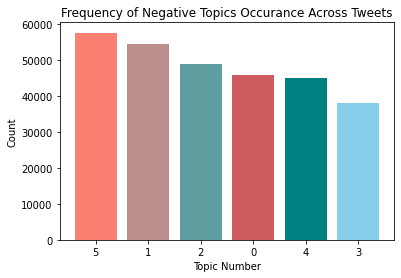

In [22]:
# Frequency of topic # and cluster # occurances across dataset
num_topics = tweets_df['Topic_Neg'].unique()
topic_counts = tweets_df['Topic_Neg'].value_counts()
plt.bar(x = num_topics, height = topic_counts, color = ['salmon', 'rosybrown', 'cadetblue', 'indianred', 'teal', 'skyblue'])
plt.xlabel("Topic Number")
plt.ylabel("Count")
plt.title("Frequency of Negative Topics Occurance Across Tweets")
plt.rc('figure', figsize=(15,11))
plt.show()

In [23]:
!pip install calmap
import calmap

New York's tweets average sentiment: -0.10471836754566993


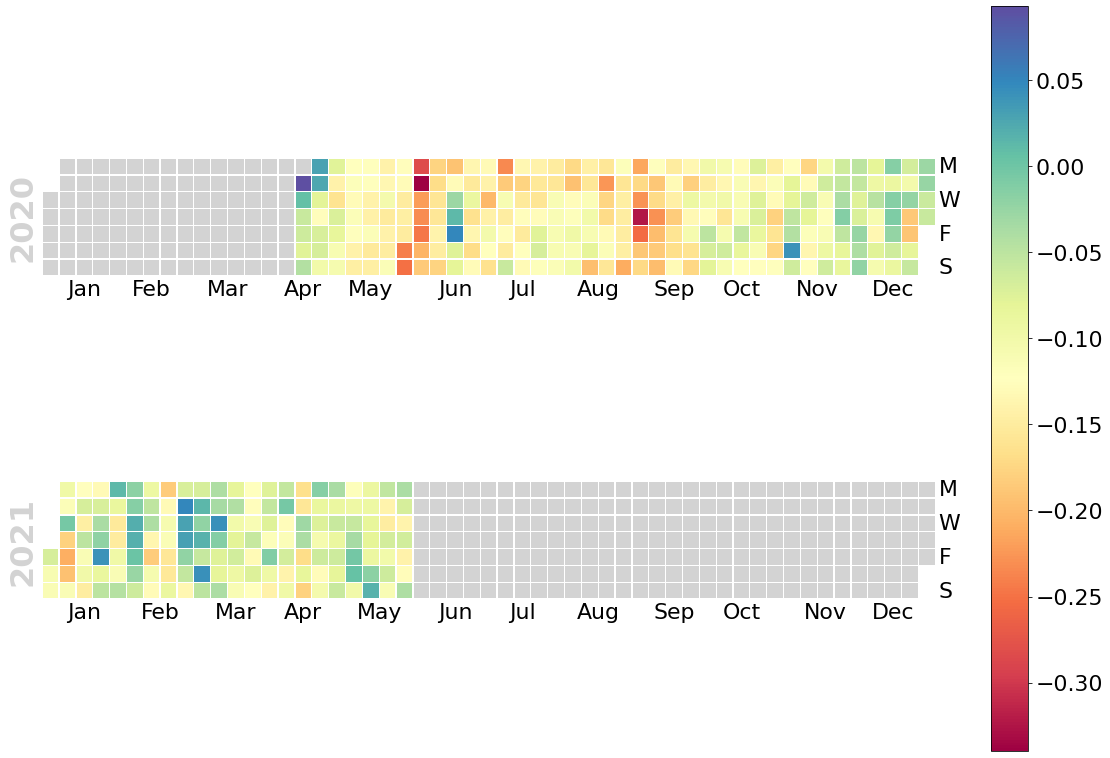

In [65]:
data_o = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NEWYORK_COVID19_TWEETS_SENTS.csv')
tweets_df_o = data_o.iloc[:, 1:]

#overall sentiments
ngroup_all_original = tweets_df_o['Sentiment_Score'].groupby(tweets_df_o['Datetime'])
nsent_avgs_allTweets_o = ngroup_all_original.mean() 
print("New York's tweets average sentiment:", nsent_avgs_allTweets_o.mean())

neg_sent_lsito = nsent_avgs_allTweets_o.to_list()
# Extra Negative Days out of all negative tweets
days = pd.DatetimeIndex(nsent_avgs_allTweets_o.index)
events = pd.Series(neg_sent_lsito, index=days)

fig, ax = calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap='Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

In [25]:
neg_sent_lsit = neg_sent_means.to_list()
neg_sent_t1 = nsent_avgs_topic1.to_list()
neg_sent_t2 = nsent_avgs_topic2.to_list()
neg_sent_t3 = nsent_avgs_topic3.to_list()
neg_sent_t4 = nsent_avgs_topic4.to_list()
neg_sent_t5 = nsent_avgs_topic5.to_list()
neg_sent_t6 = nsent_avgs_topic6.to_list()

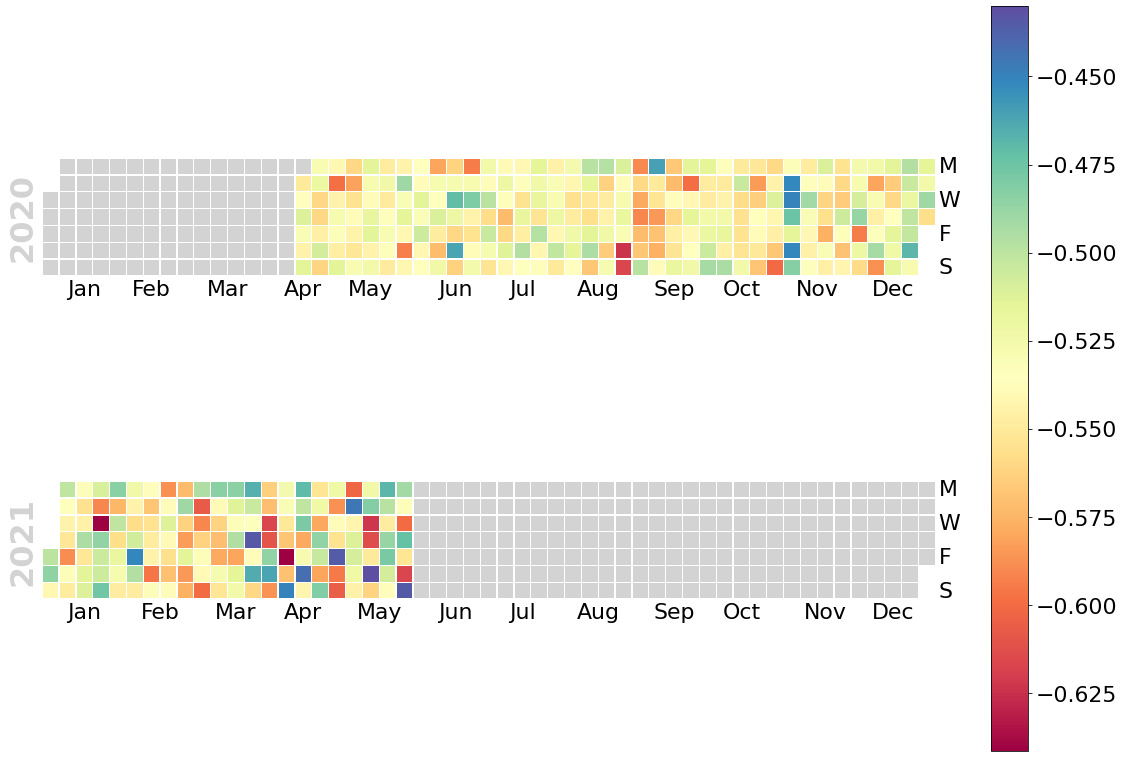

In [66]:
# Extra Negative Days out of all negative tweets
from mpl_toolkits.axes_grid1 import make_axes_locatable
days = pd.DatetimeIndex(nsent_avgs_topic1.index)
events = pd.Series(neg_sent_t1, index=days)

fig, ax = calmap.calendarplot(events, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

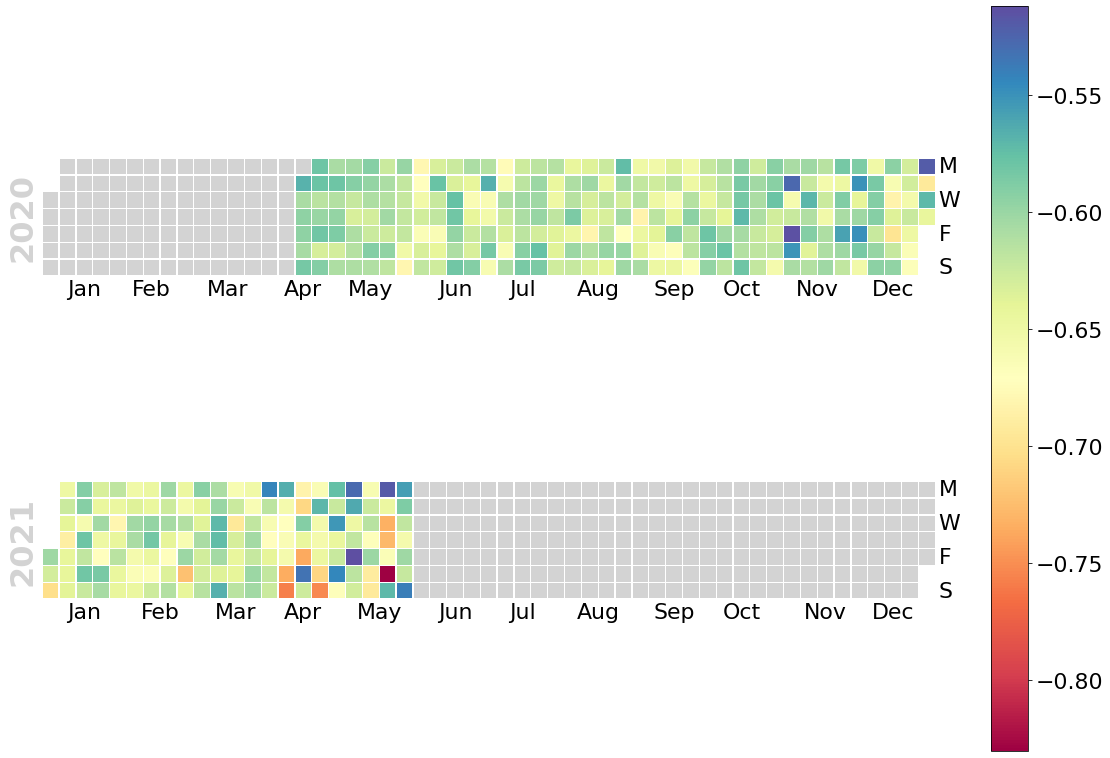

In [67]:
days2 = pd.DatetimeIndex(nsent_avgs_topic2.index)
events2 = pd.Series(neg_sent_t2 , index=days2)

fig, ax = calmap.calendarplot(events2, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())


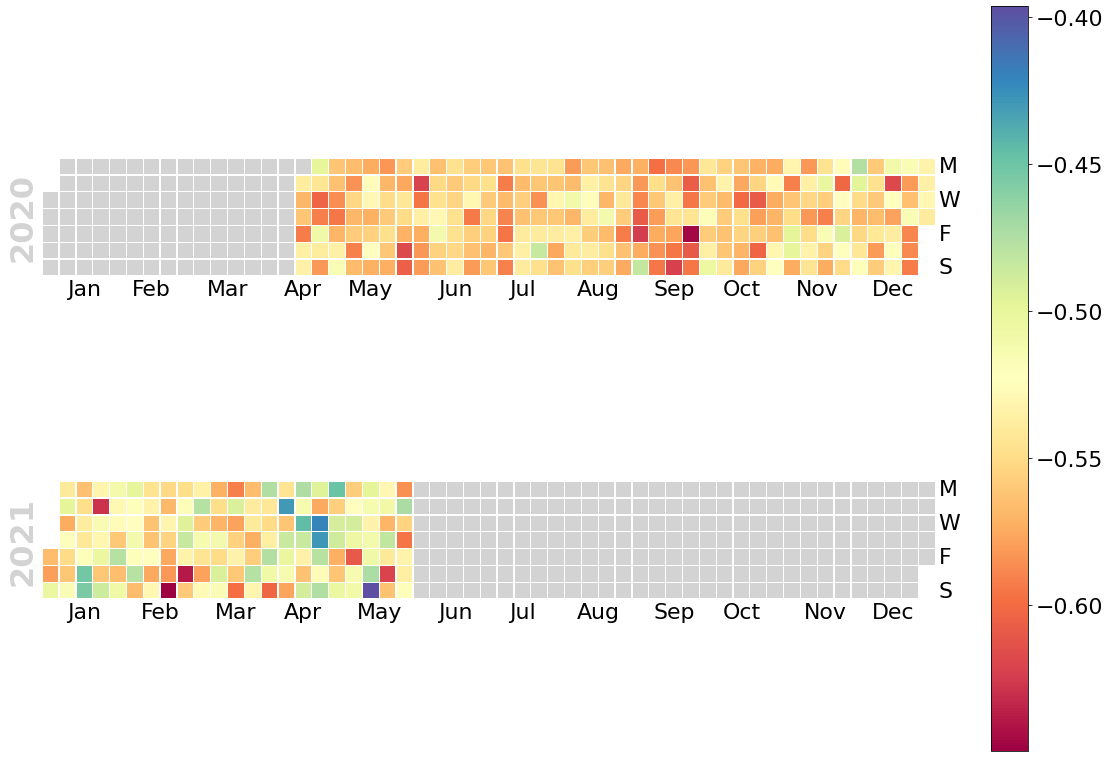

In [68]:
days3 = pd.DatetimeIndex(nsent_avgs_topic3.index)
events3 = pd.Series(neg_sent_t3 , index=days3)

fig, ax = calmap.calendarplot(events3, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

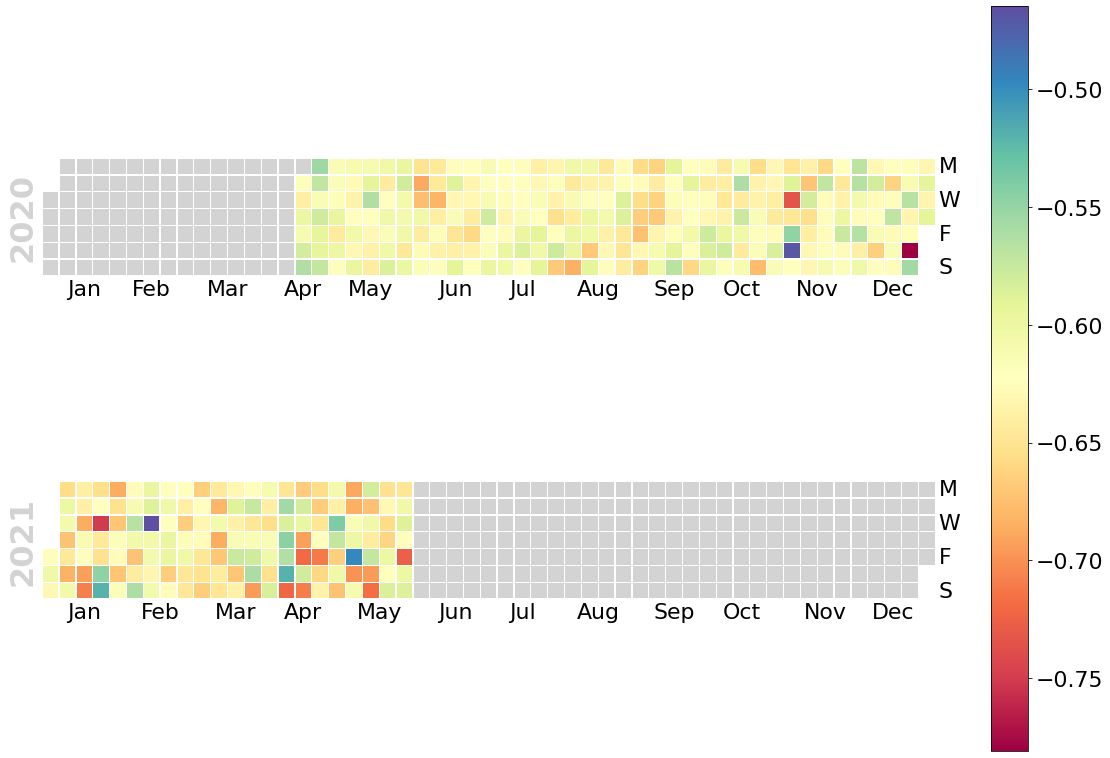

In [69]:
days4 = pd.DatetimeIndex(nsent_avgs_topic4.index)
events4 = pd.Series(neg_sent_t4 , index=days4)

fig, ax = calmap.calendarplot(events4, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

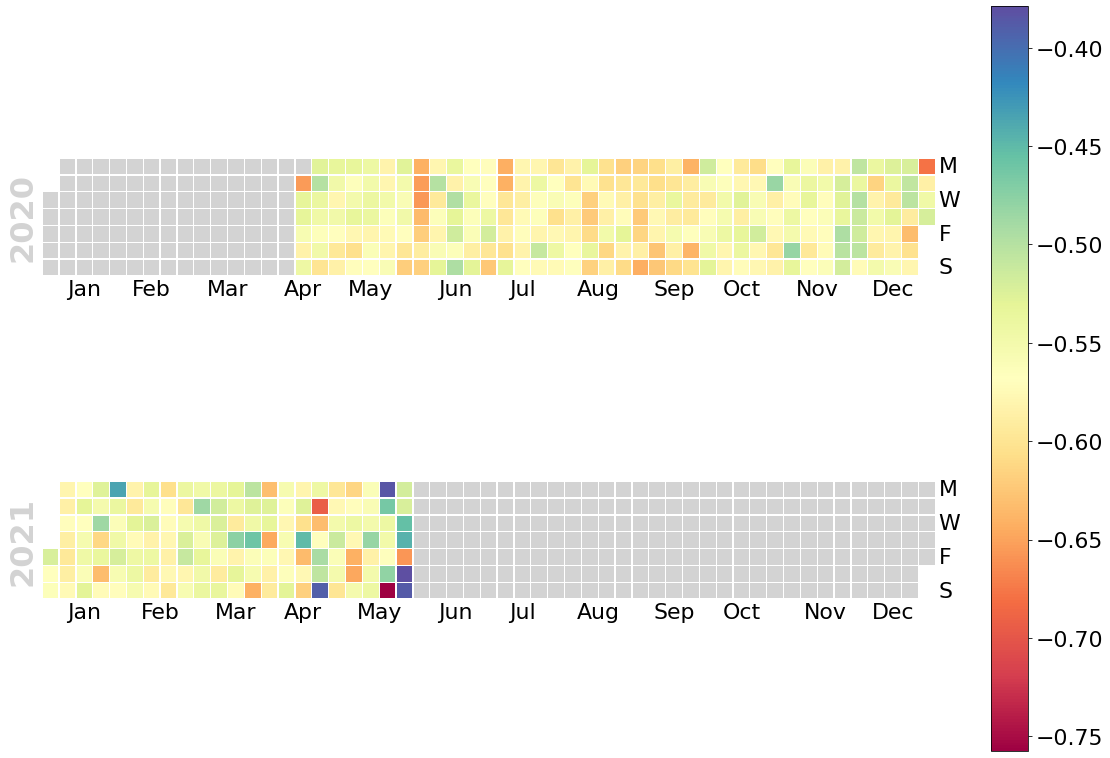

In [70]:
days5 = pd.DatetimeIndex(nsent_avgs_topic5.index)
events5 = pd.Series(neg_sent_t5 , index=days5)

fig, ax = calmap.calendarplot(events5, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())

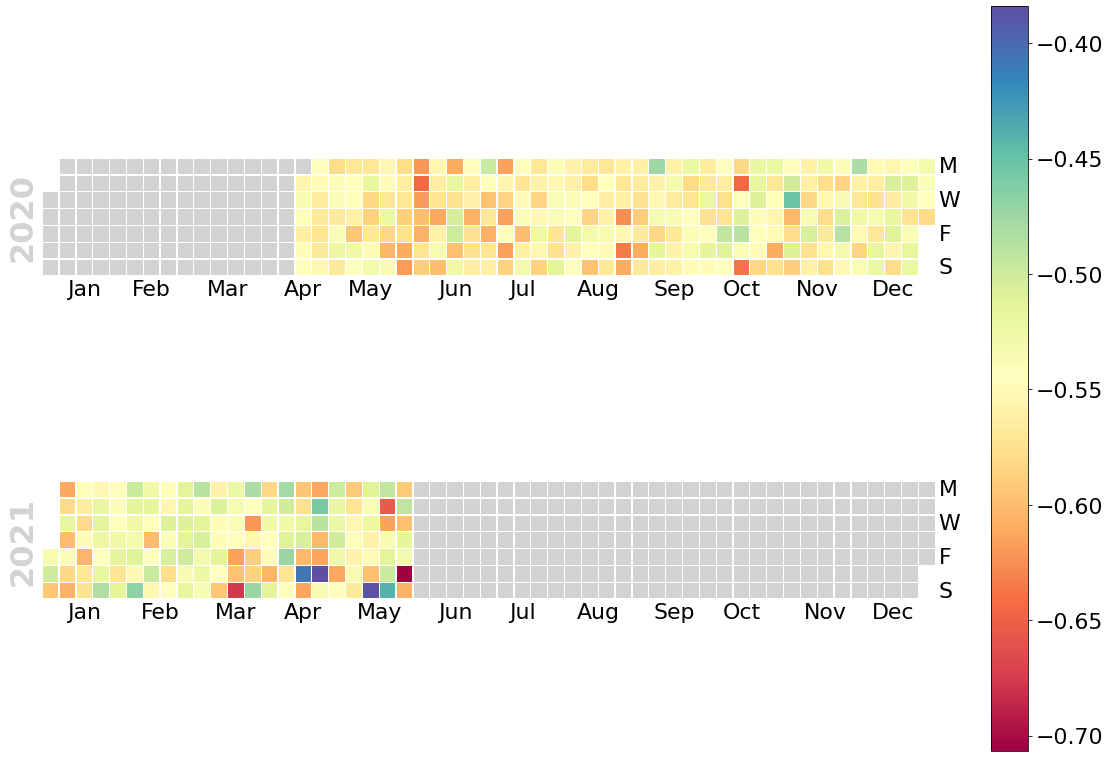

In [71]:
days6 = pd.DatetimeIndex(nsent_avgs_topic6.index)
events6 = pd.Series(neg_sent_t6 , index=days6)

fig, ax = calmap.calendarplot(events6, monthticks=3, daylabels='MTWTFSS', fillcolor='lightgrey', cmap= 'Spectral',
                    dayticks=[0, 2, 4, 6], linewidth=.3,
                    fig_kws=dict(figsize=(17, 11)))
plt.rcParams.update({'font.size': 22})
fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())